In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

from sklearn import metrics

# from sklearn.metrics import confusion_matrix

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/robertasgabrys/DSO559/main/trojanHorseData.csv')
df.head()

# Success is our target variable that we want to predict
# Success = 1 if a customer is a buyer, 0 is a non-buyer

,Gender,M,R,F,FirstPurch,BusinessExecutive,Surfer,Yuppie,Hipster,Artist,ClassicGentleman,Rugged,Formal,Casual,Comic,Success
0,1,260,16,2,18,0,0,1,0,1,0,0,0,0,0,0
1,0,259,12,5,30,1,0,1,0,0,1,1,0,0,0,0
2,1,218,16,6,42,1,1,3,1,0,0,0,0,0,0,0
3,1,143,14,1,14,0,0,0,1,0,0,0,0,0,0,0
4,1,419,8,11,52,4,0,1,0,1,1,2,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             2000 non-null   int64
 1   M                  2000 non-null   int64
 2   R                  2000 non-null   int64
 3   F                  2000 non-null   int64
 4   FirstPurch         2000 non-null   int64
 5   BusinessExecutive  2000 non-null   int64
 6   Surfer             2000 non-null   int64
 7   Yuppie             2000 non-null   int64
 8   Hipster            2000 non-null   int64
 9   Artist             2000 non-null   int64
 10  ClassicGentleman   2000 non-null   int64
 11  Rugged             2000 non-null   int64
 12  Formal             2000 non-null   int64
 13  Casual             2000 non-null   int64
 14  Comic              2000 non-null   int64
 15  Success            2000 non-null   int64
dtypes: int64(16)
memory usage: 250.1 KB


In [ ]:
# Are there any missing values?
df.isnull().sum()
# False = 0
# True = 1

Gender               0
M                    0
R                    0
F                    0
FirstPurch           0
BusinessExecutive    0
Surfer               0
Yuppie               0
Hipster              0
Artist               0
ClassicGentleman     0
Rugged               0
Formal               0
Casual               0
Comic                0
Success              0
dtype: int64

In [ ]:
# Randomly divide data into training and testing sets

In [ ]:
# Create X and y objects:
# X = explanatory variables that we believe can help predict target variable Success
# y = target variable Success
X = df.drop('Success', axis=1)
y = df['Success']

In [ ]:
# How many buyers and non0-buyers do we have?
y.value_counts()

0    1783
1     217
Name: Success, dtype: int64

In [ ]:
y.value_counts(normalize = True)

0    0.8915
1    0.1085
Name: Success, dtype: float64

In [ ]:
# what is the expected profit per customer?
45.5 * y.value_counts(normalize = True)[1] + (-4) *  y.value_counts(normalize = True)[0] 

1.3707500000000001

In [ ]:
(45.5 * y.value_counts(normalize = True)[1] + (-4) *  y.value_counts(normalize = True)[0] ) *50000

68537.5

In [ ]:
45.5 * 0.5 + (-4) * 0.5

20.75

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Randomly divide data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1) # ,stratify = y)

In [ ]:
y_train.value_counts(normalize = True)

0    0.89
1    0.11
Name: Success, dtype: float64

In [ ]:
45.5 *0.11 +(-4) *0.89

1.4449999999999998

In [ ]:
1.44*50000

72000.0

In [ ]:
y_test.value_counts(normalize = True)

0    0.895
1    0.105
Name: Success, dtype: float64

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Build a decision tree model (classifier) using training set. Trainign set consist of X_train and corresponding y_train
M = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)

In [ ]:
# What is the accuracy (score) of this model ON THE TRAINING SET? Accuracy = proportion of correct predictions
M.score(X_train,y_train)

0.9992857142857143

In [ ]:
# What is the accuracy (score) of this model ON THE TESTING SET?
M.score(X_test,y_test)

0.8116666666666666

In [ ]:
# predict _proba = predicted probability
# first value represents the predicted probability of Not purchasing a product
# second - predicted of purchasing  a product 
M.predict_proba(X_test)[:20]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [ ]:
M.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
M.get_depth()

28

In [ ]:
M.get_n_leaves()

226

In [ ]:
M.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

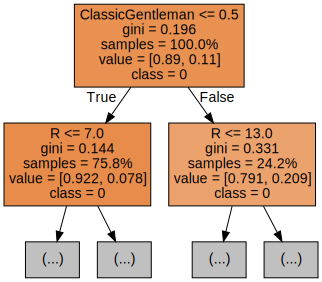

In [ ]:
dot_data = export_graphviz(M,max_depth=1, feature_names = X_train.columns,class_names=['0','1'],filled=True,proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
y_train

1194    0
45      0
1477    0
1293    1
1736    0
       ..
1791    0
1096    0
1932    0
235     0
1061    0
Name: Success, Length: 1400, dtype: int64

In [ ]:
M.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Calculate proportion of correct predictions on trainin and testing sets separately:
print("Training set", round(metrics.accuracy_score(y_true = y_train, y_pred = M.predict(X_train))*100,2))
print("Testing set", round(metrics.accuracy_score(y_true = y_test, y_pred = M.predict(X_test))*100,2))
# accuracy could be misleading when we have inbalanced data, i.e. most customers are non-buyers

Training set 99.93
Testing set 81.17


In [ ]:
# Precision: 
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
print("Training set", round(metrics.precision_score(y_true = y_train, y_pred = M.predict(X_train))*100,2))
print("Testing set", round(metrics.precision_score(y_true = y_test, y_pred = M.predict(X_test))*100,2))

# A product will be sent to #tp + #fp = total number of customers that are predicted as buyers

Training set 100.0
Testing set 15.28


In [ ]:
45.5 *0.1528 +(-4) *(1-0.1528)

3.5636

In [ ]:
# Recall(or Sensitivity): 
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

print("Training set", round(metrics.recall_score(y_true = y_train, y_pred = M.predict(X_train))*100,2))
print("Testing set", round(metrics.recall_score(y_true = y_test, y_pred = M.predict(X_test))*100,2))

# proportion of buyers that are predicted as buyers

Training set 99.35
Testing set 17.46


In [ ]:
# let's create a confusion matrix = a table that compares actual target variable values with predicted class
metrics.confusion_matrix(y_true = y_train, y_pred = M.predict(X_train))

array([[1246,    0],
       [   1,  153]])

In [ ]:
# Create a confusion matrix using pd.crosstab:
y_pred = M.predict(X_train)
pd.crosstab(index = y_train, columns = y_pred)

col_0,0,1
Success,,
0,1246,0
1,1,153


In [ ]:
# Create a confusion matrix using pd.crosstab:
y_pred = M.predict(X_test)
pd.crosstab(index = y_test, columns = y_pred)

col_0,0,1
Success,,
0,476,61
1,52,11


In [ ]:
X_train.head()

,Gender,M,R,F,FirstPurch,BusinessExecutive,Surfer,Yuppie,Hipster,Artist,ClassicGentleman,Rugged,Formal,Casual,Comic
1194,1,55,12,2,16,0,1,0,0,0,0,0,0,0,0
45,0,372,10,12,44,0,1,3,2,0,2,1,1,0,1
1477,1,49,14,1,14,1,0,0,0,0,0,0,0,0,0
1293,0,190,10,12,40,2,0,3,1,1,1,1,1,0,0
1736,0,120,14,2,16,0,0,0,0,0,0,1,0,0,0


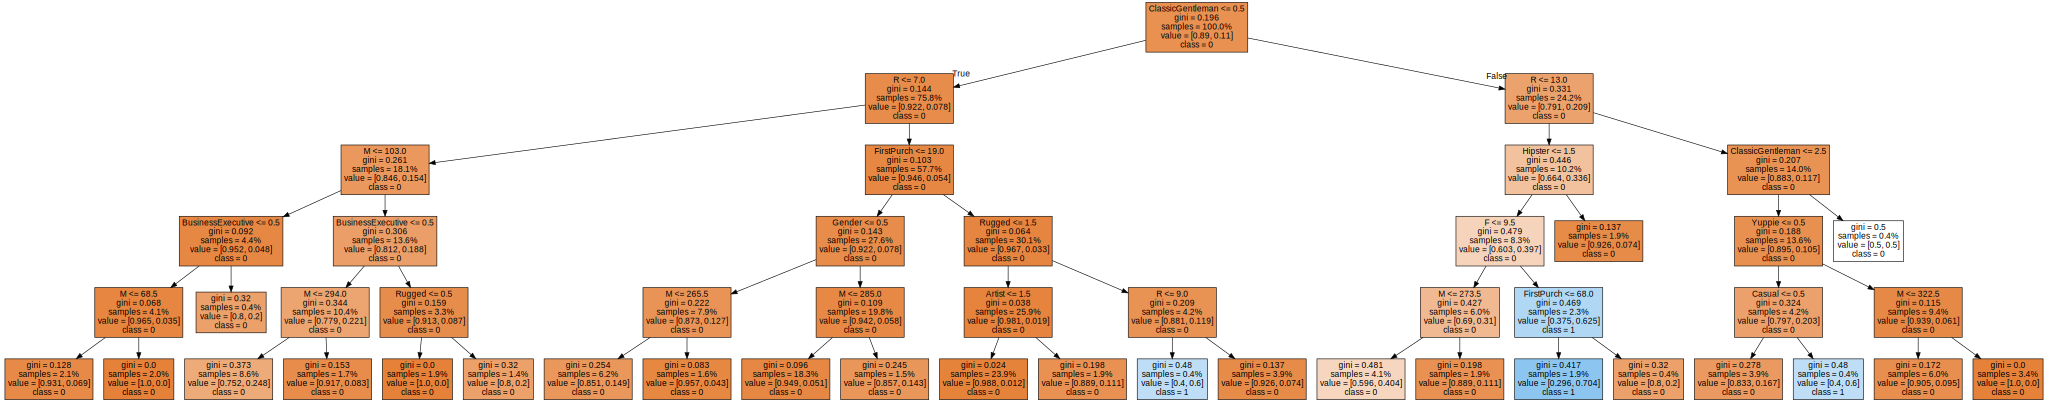

In [ ]:
# To prevent from over fitting let's build a lesss complex tree (fewer splits)
M = DecisionTreeClassifier(random_state=1,max_depth = 5,min_samples_split=30,min_samples_leaf=5).fit(X_train,y_train)
dot_data = export_graphviz(M,feature_names = X_train.columns,class_names=['0','1'],filled=True,proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
# Predicted probabilities
M.predict_proba(X_train)

array([[0.94921875, 0.05078125],
       [0.92592593, 0.07407407],
       [0.94921875, 0.05078125],
       ...,
       [0.92592593, 0.07407407],
       [0.83333333, 0.16666667],
       [0.94921875, 0.05078125]])

In [ ]:
M.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# How many customers in teh trainin gset have predicted probability of buy > predicted probability of nonbuy?
M.predict(X_train).sum()

37

In [ ]:
# How many true buyers do we have in the training set?
y_train.sum()

154

In [ ]:
M.predict(X_test).sum()

25

In [ ]:
y_test.sum()

63

In [ ]:
# so far we used threshold of 0.5 to clkassify customers into buyers (1) and non-buyers (0) = if predicted probability of buy > predicted
# probability of non buy -> a custer is classified as a buyer = if predicted probability of buy > 0.5 a ctusmoer is classified as a buyer, 
# otherwise as a non buyer

# Let's try different thresholds (cut-off probabilities): for example 0.15

In [ ]:
confusionMatrix = pd.crosstab(index = y_test, columns = M.predict(X_test),margins = True)
loss = - 4
profit = 45.5
loss * confusionMatrix.loc[0,1]  / confusionMatrix.loc['All',1] + profit * confusionMatrix.loc[1,1]  / confusionMatrix.loc['All',1]

9.86

In [ ]:
(loss * confusionMatrix.loc[0,1]  / confusionMatrix.loc['All',1] + profit * confusionMatrix.loc[1,1]  / confusionMatrix.loc['All',1])*50000

493000.0

In [ ]:
# is it feasable to achieve 9.86 expected profit per customer?
25/600 * 500000

20833.333333333332

In [ ]:
# let's change threshold
threshold =0.15 # if predicted probability of buy > threshold classify a customer as buyer, otherwise as a non buyer
# 0.15 is arbitrarily chosen
y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1 # or (M.predict_proba(X_test)[:,1] >= threshold).astype(int)

In [ ]:
confusionMatrix = pd.crosstab(index = y_test, columns = y_pred,margins = True)
loss = - 4
profit = 45.5
loss * confusionMatrix.loc[0,1]  / confusionMatrix.loc['All',1] + profit * confusionMatrix.loc[1,1]  / confusionMatrix.loc['All',1]

5.178807947019868

In [ ]:
confusionMatrix

col_0,0,1,All
Success,,,
0,414,123,537
1,35,28,63
All,449,151,600


In [ ]:
151/600*500000

125833.33333333333

In [ ]:
# Determine the value of threshold that gives the smallest accuracy score
# First create a 1D grid of threshold 0.00,0.01,...0.99,1.00
thresholds = np.linspace(0,1,100)

In [ ]:
round(metrics.accuracy_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2)

73.67

In [ ]:
# Use list comprehension to find accuracy scores for each threshold in thresholds: 
AccuracyScores = [round(metrics.accuracy_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]

In [ ]:
AccuracyScores 

[10.5,
 14.67,
 36.33,
 36.33,
 36.33,
 37.17,
 54.17,
 55.67,
 60.67,
 61.0,
 65.17,
 66.33,
 66.33,
 66.33,
 66.33,
 73.67,
 73.67,
 78.33,
 78.33,
 78.33,
 79.5,
 79.5,
 79.5,
 79.5,
 79.5,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.67,
 87.67,
 87.67,
 87.67,
 87.67,
 87.67,
 87.67,
 87.67,
 87.67,
 87.67,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5,
 89.5]

In [ ]:
thresholds[AccuracyScores==max(AccuracyScores)][0]

0.7070707070707072

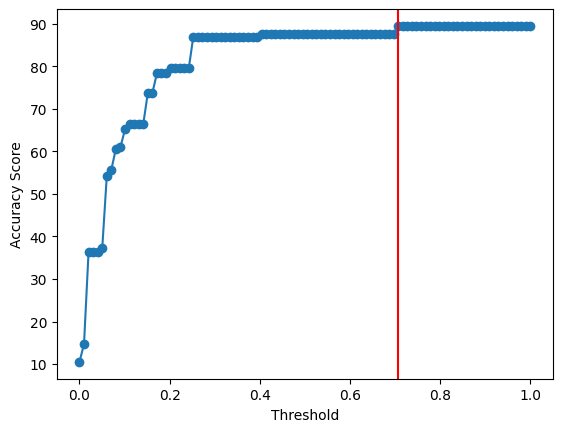

In [ ]:
# Visualize the results by creating a line graph: accuracy score versus cut-off proba/threshold
plt.plot(thresholds,AccuracyScores,marker='o')
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.axvline(thresholds[AccuracyScores==max(AccuracyScores)][0],color='red')


In [ ]:
# What is the proportion on non-buyers?
y_test.value_counts(normalize=True)
# if we predict each customer to be a non-buyer in the testing set and not use any model, accuracy (proportion of correct predictions) = 89.5%

0    0.895
1    0.105
Name: Success, dtype: float64

In [ ]:
M.predict(X_test).mean() # proportion of predicted 1s
# Model predicts 96% of testing set to be non-buyers

0.041666666666666664

In [ ]:
# using optimal threshold
((M.predict_proba(X_test)[:,1] >= 0.7)*1).mean()

0.03666666666666667

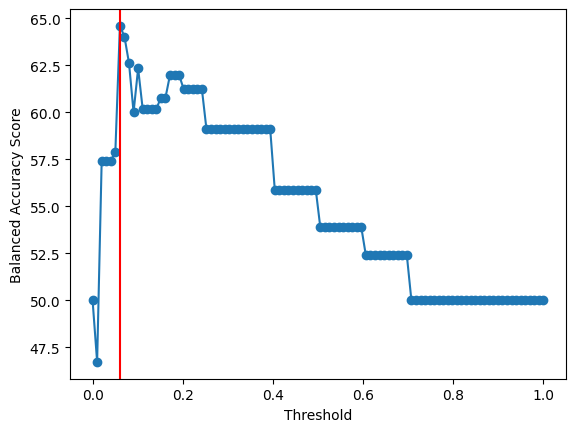

In [ ]:
# Use list comprehension to find balanced accuracy scores for each threshold in thresholds: 
BalancedAccuracyScores = [round(metrics.balanced_accuracy_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]
# Visualize the results by creating a line graph: accuracy score versus cut-off proba/threshold
plt.plot(thresholds,BalancedAccuracyScores,marker='o')
plt.xlabel('Threshold')
plt.ylabel('Balanced Accuracy Score')
plt.axvline(thresholds[BalancedAccuracyScores==max(BalancedAccuracyScores)][0],color='red')

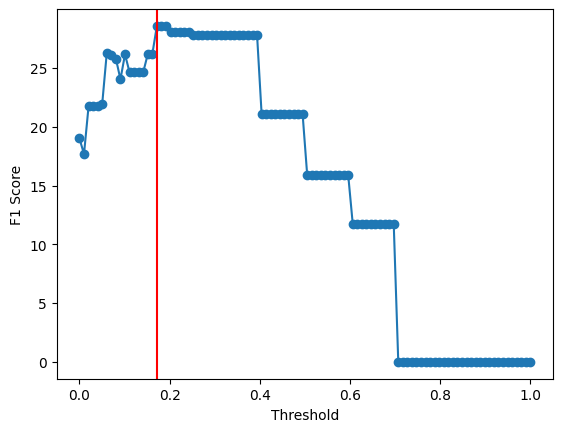

In [ ]:
# Use list comprehension to find F1 scores for each threshold in thresholds: 
F1Scores = [round(metrics.f1_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]
# Visualize the results by creating a line graph: accuracy score versus cut-off proba/threshold
plt.plot(thresholds,F1Scores,marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.axvline(thresholds[F1Scores==max(F1Scores)][0],color='red')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

Text(0.5, 0, 'Threshold')

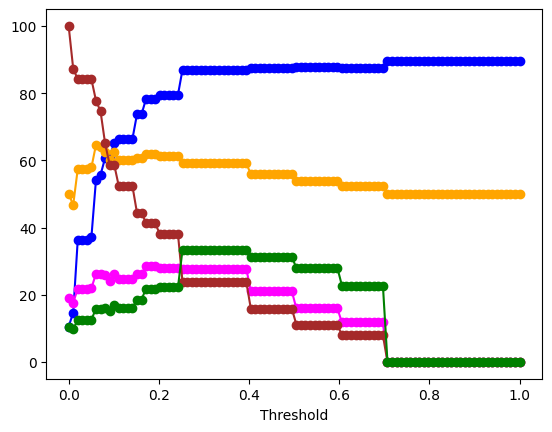

In [ ]:
thresholds = np.linspace(0,1,100)
# Plot accuracy, balanced accuracy, F1, Recall, Precesion on one graph:
AccuracyScores = [round(metrics.accuracy_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]
BalancedAccuracyScores = [round(metrics.balanced_accuracy_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]
F1Scores = [round(metrics.f1_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]
recallScores = [round(metrics.recall_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]
precisionScores = [round(metrics.precision_score(y_true = y_test, y_pred = (M.predict_proba(X_test)[:,1] >= threshold)*1)*100,2) for threshold in thresholds]

plt.plot(thresholds,AccuracyScores,marker='o',color='blue')
plt.plot(thresholds,BalancedAccuracyScores,marker='o',color='orange')
plt.plot(thresholds,F1Scores,marker='o',color='magenta')
plt.plot(thresholds,recallScores,marker='o',color='brown')
plt.plot(thresholds,precisionScores,marker='o',color='green')
plt.xlabel('Threshold')


In [ ]:
confusionMatrix = pd.crosstab(index = y_test, columns = (M.predict_proba(X_test)[:,1] >= 0.2)*1,\
                              margins = True, margins_name='Total',rownames=['Actual'],colnames=['Predicted'])
confusionMatrix

Predicted,0,1,Total
Actual,,,
0,444,93,537
1,37,26,63
Total,481,119,600


In [ ]:
# Find profit for each threshold in thresholds and plot it

# First let's create a function that calculates profit
# y_probs = outcome of M.predict_proba() -> give predicted probability of 0 and 1
def profit_function(y_actual, y_probs, threshold, profit=45.5,loss=-4):
    confusionMatrix = pd.crosstab(index = y_actual, columns = (y_probs[:,1]>=threshold)*1, margins = True, margins_name='Total',\
                                  rownames=['Actual'],colnames=['Predicted'])
    TN = confusionMatrix.loc[0,0]
    FP = confusionMatrix.loc[0,1]
    FN = confusionMatrix.loc[1,0]
    TP = confusionMatrix.loc[1,1]

    expectedProfit = profit * TP/confusionMatrix.loc['Total',1]  + loss * FP/confusionMatrix.loc['Total',1]

    return expectedProfit



In [ ]:
thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
# Illustration how to call a function:
# (y_actual = y_test, y_probs = M.predict_proba(X_test), threshold = 1.0, profit=45.5,loss=-4)

In [ ]:
np.unique(np.sort(M.predict_proba(X_test)[:,1]))[1:-2]

array([0.0119403 , 0.04347826, 0.05078125, 0.06896552, 0.07407407,
       0.08333333, 0.0952381 , 0.11111111, 0.14285714, 0.14942529,
       0.16666667, 0.2       , 0.24793388, 0.40350877, 0.5       ])

In [ ]:
# Find profit for each threshold: 
thresholds =np.unique(np.sort(M.predict_proba(X_test)[:,1]))[1:-2]
profits  = [profit_function(y_test, M.predict_proba(X_test), threshold) for threshold in thresholds]

In [ ]:
profits

[0.8703041144901609,
 2.172941176470588,
 2.246428571428571,
 3.8241935483870972,
 3.8333333333333335,
 3.9588235294117644,
 3.4755102040816324,
 4.325,
 3.9682926829268292,
 4.552356020942408,
 5.178807947019868,
 6.815126050420169,
 7.0,
 12.5,
 11.46875]

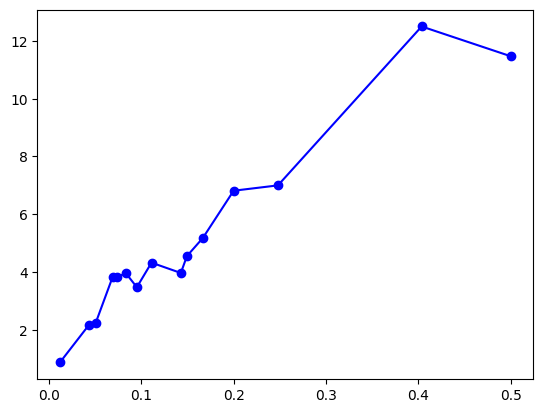

In [ ]:
plt.plot(thresholds,profits,marker='o',color='blue')

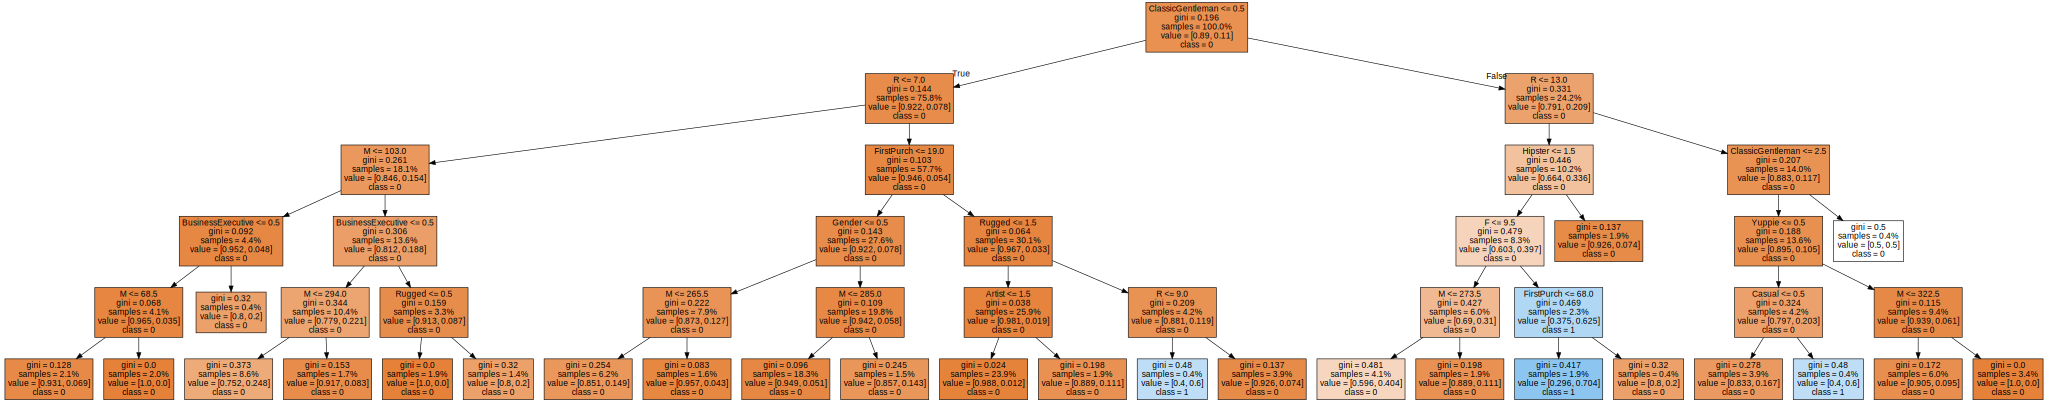

In [ ]:
# To prevent from over fitting let's build a lesss complex tree (fewer splits)
M = DecisionTreeClassifier(random_state=200,max_depth = 5,min_samples_split=30,min_samples_leaf=5).fit(X_train,y_train)
dot_data = export_graphviz(M,feature_names = X_train.columns,class_names=['0','1'],filled=True,proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
# So far we have been learning what threshold gives us optimal accuracy metrics. 
# Now let's tunbe other model parameters
# we will use cross validation method

# create parameter dictionary 
param_dictionary = {'criterion':['gini','entropy'],
                    'max_depth':[5,10,20],
                    'min_samples_split':range(5,7),
                    'min_samples_leaf':range(5,8)
                    }
M = DecisionTreeClassifier()

# CV = cross validation
grid = GridSearchCV(M,param_grid = param_dictionary, cv = 5,n_jobs=-1,scoring = 'recall',verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
dir(grid)

In [ ]:
Mbest = grid.best_estimator_ # best model
Mbest

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5)

In [ ]:
# Find profit for each threshold: 
thresholds =np.unique(np.sort(Mbest.predict_proba(X_test)[:,1]))[1:-2]
profits  = [profit_function(y_test, Mbest.predict_proba(X_test), threshold) for threshold in thresholds]

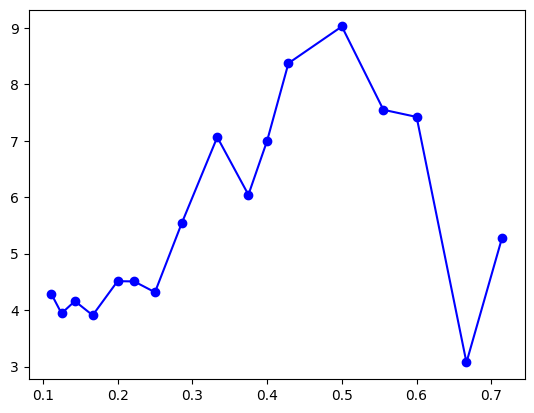

In [ ]:
plt.plot(thresholds,profits,marker='o',color='blue')

In [ ]:
grid.cv_results_

In [ ]:
round(np.max(profits)*50000,2)

451315.79